In this notebook, we use BeautifulSoup to scrape studio market share data from boxofficemojo.com and save the data as a CSV. We also do some exploratory analysis to get a feel for the data.

http://www.boxofficemojo.com/studio/?view=company&view2=yearly&yr=2000&p=.htm

In [1]:
import requests
from time import sleep
from bs4 import BeautifulSoup
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [2]:
build_url = lambda year: 'http://www.boxofficemojo.com/studio/?view=company&view2=yearly&yr={}&p=.htm'.format(year)
columns = ['year', 'rank', 'distributor', 'market_share', 'total_gross', 'movies_tracked', 'movies_released']
data = [columns]
value_functions = {
    'rank': int,
    'distributor': str,
    'market_share': lambda string: float(string.replace('%', '')) / 100,
    'total_gross': lambda string: float(string.replace('$', '').replace(',','').replace('k', '000')) * 1e6,
    'movies_tracked': int,
    'movies_released': int
}

def get_data_for_year(year):
    response = requests.get(build_url(year))
    soup = BeautifulSoup(response.text,"lxml")
    tables = soup.find_all('table')
    # The second to last table is the one with the data
    rows = tables[-2].find_all('tr')
    for row in rows[1:]:
        cell_strings = list(map((lambda c: c.text), row.find_all('td')))
        cells = [year]
        for i, cell_string in enumerate(cell_strings, 1):
            cells.append(value_functions[columns[i]](cell_string))
        data.append(cells)


In [7]:
years = list(range(2000, 2018)) # January 2000 through December 2017

In [8]:
# # Uncomment the following lines to regenerate the csv
# for year in years:
#     sleep(1) # Throttle requests
#     get_data_for_year(year)
# with open('studio_market_share_by_year.csv', 'w') as studio_csv:
#     writer = csv.writer(studio_csv)
#     writer.writerows(data)

In [24]:
df = pd.read_csv('studio_market_share_by_year.csv')
df['avg_gross'] = df['total_gross'] / df['movies_tracked']
df.head(10)

,year,rank,distributor,market_share,total_gross,movies_tracked,movies_released,avg_gross
0,2000,1,Buena Vista,0.155,1.175600e+09,30,21,3.918667e+07
1,2000,2,Universal,0.141,1.069100e+09,19,13,5.626842e+07
2,2000,3,Warner Bros.,0.119,9.053000e+08,28,22,3.233214e+07
3,2000,4,Paramount,0.104,7.911000e+08,19,12,4.163684e+07
4,2000,5,DreamWorks SKG,0.103,7.772000e+08,12,10,6.476667e+07
5,2000,6,20th Century Fox,0.095,7.233000e+08,17,13,4.254706e+07
6,2000,7,Sony / Columbia,0.090,6.815000e+08,34,29,2.004412e+07
7,2000,8,New Line,0.049,3.745000e+08,16,14,2.340625e+07
8,2000,9,Miramax,0.048,3.653000e+08,27,23,1.352963e+07
9,2000,10,Dimension Films,0.015,1.109000e+08,2,2,5.545000e+07


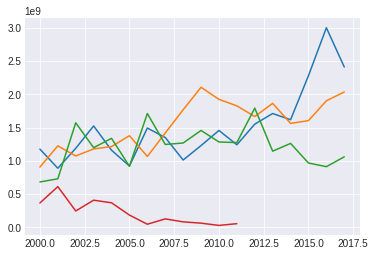

In [44]:
studios = df.loc[df.movies_tracked > 20].distributor.unique()[0:4]
for studio in studios:
    _df = df.loc[df.distributor == studio]
    plt.plot(_df.year, _df.total_gross);